# Calculate magnitude on Amy's data
20250219

Author: Kyoko Kusano

Standard magnitude calculation (the first code)  


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math

import os
import sys
from pathlib import Path

# フォルダパスを指定してsys.pathに追加
sys.path.append(str(Path(os.getcwd()).resolve().parent / "func"))

# 関数が格納されているモジュールをインポート
import amalysis as amalysis

In [2]:
raw_path = str(Path(os.getcwd()).resolve()) + '/data/Amy_dissimilarity.csv'
raw = pd.read_csv(raw_path, header=None).T
raw.index = ['word1'] + ['word2'] + list(range(1, raw.shape[0]-1))
raw = raw.rename(columns={0:'BDI'})
raw.loc['word2', 'BDI'] = np.nan
head = raw.iloc[:2, :].copy()

df_raw = raw.iloc[2:, :].copy()
df_raw = df_raw.sort_values('BDI', ignore_index=True)
df_raw = df_raw.drop('BDI', axis=1)
df_raw = df_raw # dissimilarity (make it similarity in exponential part)
df_raw = pd.concat([head, df_raw]).drop('BDI', axis=1).copy()
df_raw

,1,2,3,4,5,6,7,8,9,10,...,244,245,246,247,248,249,250,251,252,253
word1,brown,orange,red,black,green,red,envy,fear,pink,blue,...,blue,blue,fear,purple,disgust,calm,orange,green,brown,anxiety
word2,anger,anxiety,yellow,blue,calm,pink,joy,anger,green,anger,...,envy,anxiety,happiness,confidence,defeated,happiness,pink,disgust,joy,boredom
0,3,4,2,2,4,2,6,6,2,4,...,6,6,7,1,0,1,1,6,6,0
1,7,5,5,6,2,2,7,6,7,7,...,6,5,7,3,3,2,4,5,5,4
2,6,6,0,0,2,0,2,1,1,5,...,7,6,6,7,3,1,0,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,7,7,7,3,3,3,7,3,3,7,...,7,0,7,7,2,0,7,0,7,7
116,7,7,6,5,4,2,7,2,5,7,...,3,6,7,3,2,0,2,1,7,7
117,7,7,4,3,3,2,7,3,5,7,...,5,7,7,2,6,0,1,7,7,4
118,7,5,4,4,3,1,7,3,4,6,...,7,6,5,3,3,2,3,1,7,3


In [ ]:
# make a "similarity matrix" in tlab: word1 and 2 are inordered, use unique word in case you didn't order it
unique_words = np.array(['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black', 'happiness', 'joy', 'calm', 'confidence', 'envy', 'fear', 'anxiety', 'disgust', 'sadness', 'confusion', 'boredom', 'defeated', 'anger'])

df_dissim = amalysis.create_dissimilarity_matrix(df_raw, unique_words)

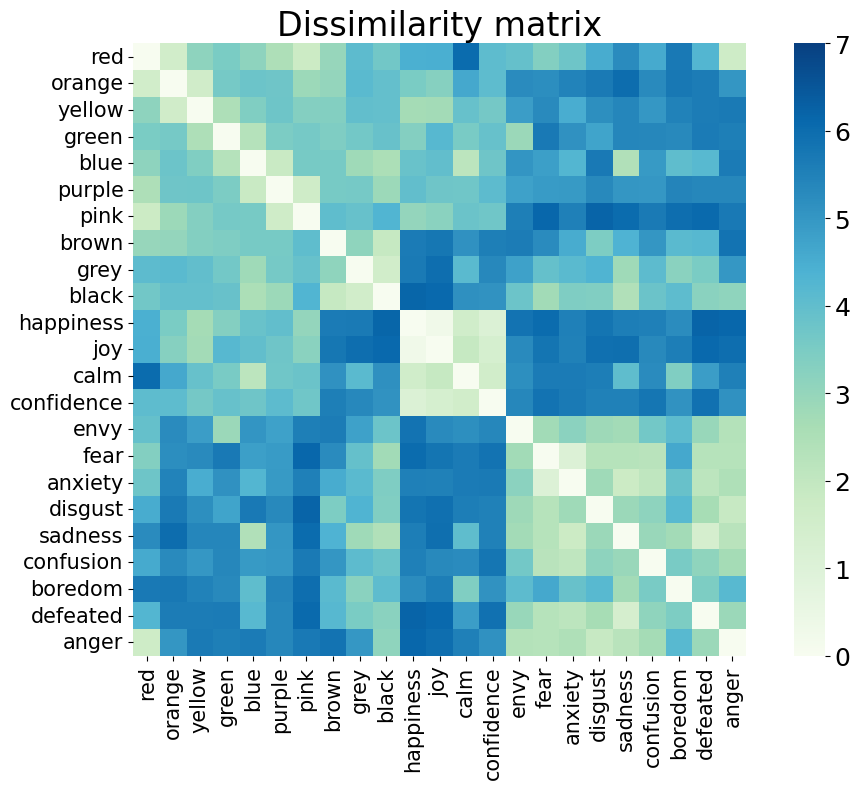

In [5]:
figpath_dissim = "/home/jovyan/work/Amy/fig/allsub/Dissimilarity matrix"
amalysis.plot_dissimilarity_heatmap(df_dissim, annotation=False, mode_dissim=True, figpath=figpath_dissim)

In [6]:
# make exponential of similarity matrix to make it distance, "similarity matrix" in Leinster

df_dist = df_dissim.copy()

for i in range(len(df_dist)):
    for j in range(len(df_dist.iloc[0, :])):
        df_dist.iloc[i, j] = math.e ** (-1 * df_dissim.iloc[i, j]) # dissimilarity -> similarity
        
df_dist   

,red,orange,yellow,green,blue,purple,pink,brown,grey,black,...,confidence,envy,fear,anxiety,disgust,sadness,confusion,boredom,defeated,anger
red,1.000000,0.212248,0.043937,0.030197,0.043572,0.084867,0.172332,0.051905,0.016851,0.025562,...,0.017278,0.019578,0.035084,0.023518,0.010925,0.005118,0.010221,0.003346,0.014028,0.184212
orange,0.212248,1.000000,0.201897,0.027324,0.022371,0.024113,0.056888,0.048964,0.015764,0.019095,...,0.017278,0.005204,0.005425,0.004296,0.003459,0.002458,0.005075,0.003236,0.003637,0.006572
yellow,0.043937,0.201897,1.000000,0.084867,0.033653,0.023323,0.035973,0.035084,0.018779,0.019095,...,0.026872,0.007699,0.004992,0.011017,0.005656,0.004554,0.006851,0.004190,0.003667,0.003459
green,0.030197,0.027324,0.084867,1.000000,0.098602,0.030962,0.027097,0.032279,0.025991,0.020928,...,0.020411,0.055484,0.003346,0.005946,0.008871,0.004554,0.004592,0.004868,0.003577,0.003823
blue,0.043572,0.022371,0.033653,0.098602,1.000000,0.162567,0.028250,0.028250,0.061319,0.078735,...,0.023913,0.006463,0.007960,0.013682,0.003374,0.088478,0.007202,0.017715,0.015248,0.003547
purple,0.084867,0.024113,0.023323,0.030962,0.162567,1.000000,0.198559,0.028015,0.027324,0.056888,...,0.016711,0.008368,0.007447,0.007263,0.004868,0.006627,0.006851,0.004369,0.004670,0.004592
pink,0.172332,0.056888,0.035973,0.027097,0.028250,0.198559,1.000000,0.017568,0.020074,0.013456,...,0.024724,0.003855,0.002151,0.003986,0.002064,0.002397,0.003402,0.002563,0.002338,0.003318
brown,0.051905,0.048964,0.035084,0.032279,0.028250,0.028015,0.017568,1.000000,0.044675,0.150820,...,0.003855,0.003667,0.005161,0.010835,0.031482,0.012693,0.006682,0.015764,0.015121,0.002904
grey,0.016851,0.015764,0.018779,0.025991,0.061319,0.027324,0.020074,0.044675,1.000000,0.215815,...,0.004709,0.008438,0.019742,0.016029,0.013015,0.060810,0.016851,0.039756,0.029452,0.006851
black,0.025562,0.019095,0.019095,0.020928,0.078735,0.056888,0.013456,0.150820,0.215815,1.000000,...,0.006097,0.022371,0.063397,0.032011,0.034218,0.087744,0.021818,0.017134,0.040424,0.044305


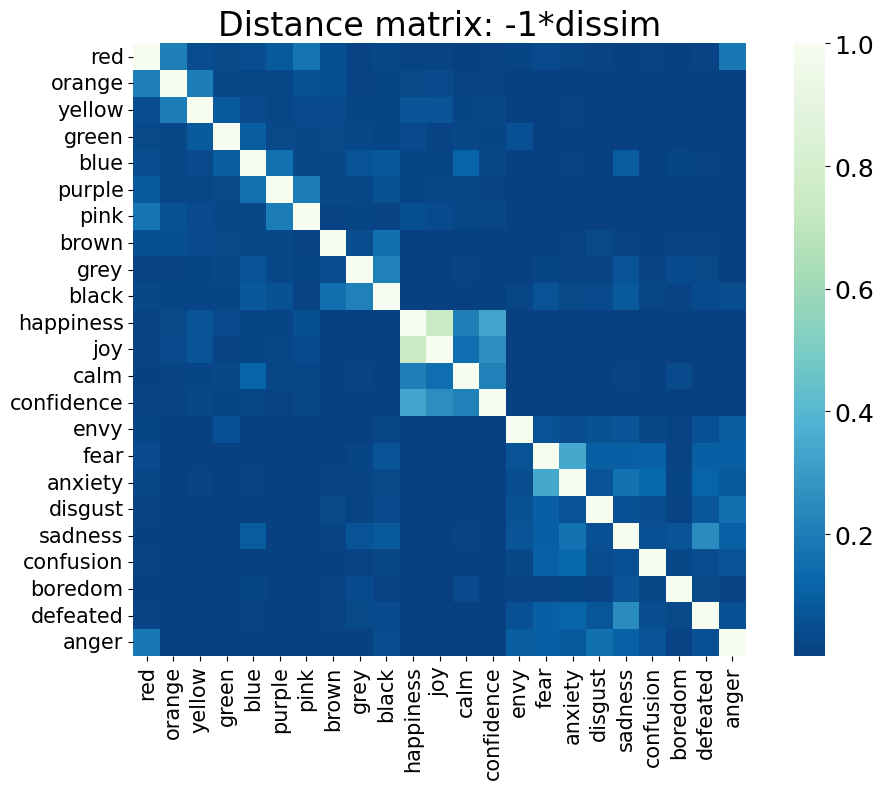

In [7]:
# visualize df_dist
figpath_sim = "/home/jovyan/work/Amy/fig/allsub/Distance matrix: -1*dissim"
amalysis.plot_dissimilarity_heatmap(df_dist, annotation=False, mode_dissim=False, figpath=figpath_sim)

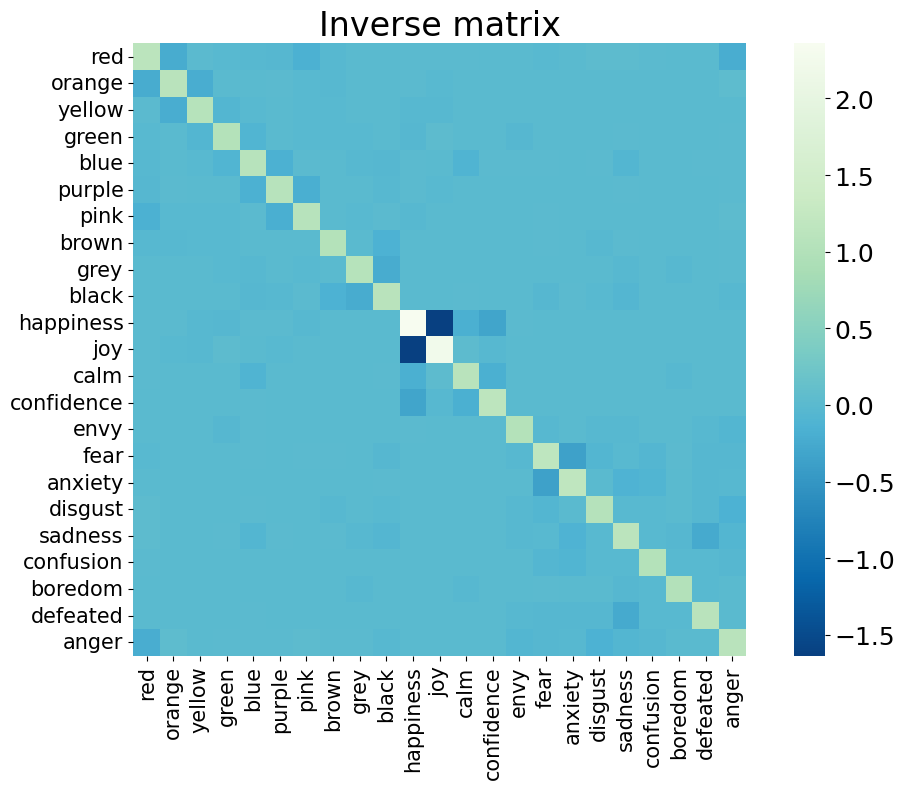

In [8]:
# calculate inversed dist_mat (M) 

mat_dist = df_dist.to_numpy()
mat_dist_inv = np.linalg.inv(mat_dist) # mat_dist_inv @ mat_dist で丸め誤差以内（たぶん？うまくいかなきゃエラーでるぽいし）

figpath_inv = figpath_sim = "/home/jovyan/work/Amy/fig/allsub/Inverse matrix"

df_dist_inv = pd.DataFrame(mat_dist_inv, index=unique_words, columns=unique_words)
amalysis.plot_dissimilarity_heatmap(df_dist_inv, annotation=False, mode_dissim=False, figpath=figpath_inv)

In [9]:
# calculate magnitude of M
magnitude = np.sum(mat_dist_inv)
print(f'magnitude for all subject, color and emotion: {magnitude}')

magnitude for all subject, color and emotion: 12.709896924387523


In [10]:
mat_dist_col = mat_dist[0:10,0:10]
mat_dist_emo = mat_dist[10:23, 10:23]

mat_dist_col_inv = np.linalg.inv(mat_dist_col)
mat_dist_emo_inv = np.linalg.inv(mat_dist_emo)

mag_col = np.sum(mat_dist_col_inv)
mag_emo = np.sum(mat_dist_emo_inv)


print(f'Magnitude for the subject-averaged data, includes color and emotion: {magnitude:.3f}')
print(f'Magnitude for the subject-averaged data, includes only color:        {mag_col:.3f}')
print(f'Magnitude for the subject-averaged data, includes only emotion:      {mag_emo:.3f}')

Magnitude for the subject-averaged data, includes color and emotion: 12.710
Magnitude for the subject-averaged data, includes only color:        6.518
Magnitude for the subject-averaged data, includes only emotion:      7.630
